In [1]:
import numpy as np
import pandas as pd
from numpy import array

In [2]:
# YOUR DATA FILE & NAME
data_file_name = 'Hopper_time_series.csv' 
data = pd.read_csv(data_file_name, skiprows=0)

# YOUR EVENT MARKINGS FILE
events = pd.read_csv("Events_durations.csv", skiprows=0)

# YOUR SAMPLE RATE (ie seconds, deciseconds)
sample_rate = 60000  #seconds

C:\Temp\ipykernel_18076\4083837721.py:3: DtypeWarning: Columns (1,3,6,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_file_name, skiprows=0)


In [3]:
def addRange (events):
    global events_split 
    events_split = pd.DataFrame()
    events = np.array(events)
    row = 0
    for _row in events:
        x = round(events[row,0],1) # Start time
        y = round(events[row,1],1) # End time
        events_split = pd.concat([events_split, pd.DataFrame([x])], axis = 0)
        while x < y:
            x = round((x + sample_rate),1)
            events_split = pd.concat([events_split, pd.DataFrame([x])], axis = 0)
        row = row + 1
    return events_split

addRange(events)

,0
0,1.525496e+12
0,1.525497e+12
0,1.525497e+12
0,1.525497e+12
0,1.525497e+12
...,...
0,1.540836e+12
0,1.540836e+12
0,1.540836e+12
0,1.540836e+12


In [4]:
data_time_col = pd.DataFrame([data.iloc[:,0]])
data_time_col = data_time_col.T

In [5]:
def createLabels(data_time_col):
    global labels_01_df
    labels_01_df = pd.DataFrame() 
    for i in data_time_col.values:
        if i in events_split.values:
            labels_01_df = pd.concat([labels_01_df, pd.DataFrame([1])], ignore_index=True)
        else:
            labels_01_df = pd.concat([labels_01_df, pd.DataFrame([0])], ignore_index=True)
    return labels_01_df

createLabels(data_time_col)

,0
0,0
1,0
2,0
3,0
4,0
...,...
264955,0
264956,0
264957,0
264958,0


In [6]:
data.insert(loc=0, column="labels", value=labels_01_df)
data.to_csv("Labelled Time Series.csv", index=False)

In [7]:
labelled_data_file_name = 'Labelled Time Series.csv' 
dataset = pd.read_csv(labelled_data_file_name, skiprows=0)

C:\Temp\ipykernel_18076\2799967159.py:2: DtypeWarning: Columns (2,4,7,9,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(labelled_data_file_name, skiprows=0)


In [8]:
dataset.drop(['Time', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis = 1, inplace = True)

In [9]:
dataset =dataset[ [ col for col in dataset.columns if col != 'labels' ]+['labels'] ]

In [10]:
dataset[' Delivery Air Dewpoint (F)']= pd.to_numeric(dataset[' Delivery Air Dewpoint (F)'], errors = 'coerce')
dataset['Regen Temp Wheel Inlet (F)']= pd.to_numeric(dataset['Regen Temp Wheel Inlet (F)'], errors = 'coerce')
dataset['Hopper 1 Hopper Outlet Temp (F)']= pd.to_numeric(dataset['Hopper 1 Hopper Outlet Temp (F)'], errors = 'coerce')
dataset['Hopper 1 Drying Monitor 2 Temp (F)']= pd.to_numeric(dataset['Hopper 1 Drying Monitor 2 Temp (F)'], errors = 'coerce')
dataset['Hopper 1 Drying Monitor 4 Temp (F)']= pd.to_numeric(dataset['Hopper 1 Drying Monitor 4 Temp (F)'], errors = 'coerce')
dataset['Hopper 1 Drying Monitor 6 Temp (Top) (F)']= pd.to_numeric(dataset['Hopper 1 Drying Monitor 6 Temp (Top) (F)'], errors = 'coerce')
dataset['labels']= pd.to_numeric(dataset['labels'], errors = 'coerce')

In [11]:
dataset.dtypes

 Delivery Air Dewpoint (F)                     float64
Regen Temp Active Setpoint (F)                 float64
Regen Temp Wheel Inlet (F)                     float64
Regen Temp Wheel Outlet (F)                    float64
Hopper 1 Delivery Air Temp (F)                 float64
Hopper 1 Hopper Outlet Temp (F)                float64
Hopper 1 Drying Monitor 1 Temp (Bottom) (F)    float64
Hopper 1 Drying Monitor 2 Temp (F)             float64
Hopper 1 Drying Monitor 3 Temp (F)             float64
Hopper 1 Drying Monitor 4 Temp (F)             float64
Hopper 1 Drying Monitor 5 Temp (F)             float64
Hopper 1 Drying Monitor 6 Temp (Top) (F)       float64
labels                                           int64
dtype: object

In [12]:
dataset.columns = ['DAD', 'RTAS', 'RTWI', 'RTWO', 'H1DAT', 'H1HOT', 'H1DM1T', 'H1DM2T','H1DM3T', 'H1DM4T', 'H1DM5T', 'H1DM6T', 'labels']

In [13]:
dataset[dataset.isna().any(axis=1)]

,DAD,RTAS,RTWI,RTWO,H1DAT,H1HOT,H1DM1T,H1DM2T,H1DM3T,H1DM4T,H1DM5T,H1DM6T,labels
19470,NaN,375.0,NaN,204.36,200.0,NaN,203.5,NaN,203.5,NaN,196.8,NaN,0


In [14]:
dataset['DAD'].fillna(method='pad', inplace=True)
dataset['RTWI'].fillna(method='pad', inplace=True)
dataset['H1HOT'].fillna(method='pad', inplace=True)
dataset['H1DM2T'].fillna(method='pad', inplace=True)
dataset['H1DM4T'].fillna(method='pad', inplace=True)
dataset['H1DM6T'].fillna(method='pad', inplace=True)
dataset[19460:19480]

,DAD,RTAS,RTWI,RTWO,H1DAT,H1HOT,H1DM1T,H1DM2T,H1DM3T,H1DM4T,H1DM5T,H1DM6T,labels
19460,-37.17,375.0,375.40,220.76,200.0,151.5,203.50,202.34,203.5,202.79,197.15,141.03,0
19461,-37.37,375.0,374.97,219.52,200.0,153.0,203.51,202.34,203.5,202.80,197.12,142.52,0
19462,-37.28,375.0,375.22,231.34,200.0,153.5,203.51,202.34,203.5,202.80,197.19,143.43,0
19463,-37.08,375.0,374.84,186.04,200.0,155.0,203.51,202.34,203.5,202.80,197.25,144.15,0
19464,-36.87,375.0,374.73,212.39,200.0,130.0,203.51,202.34,203.5,202.80,197.25,140.26,0
19465,-37.01,375.0,375.57,206.53,200.0,132.0,203.51,202.34,203.5,202.80,197.25,136.50,0
19466,-37.22,375.0,375.00,217.39,200.0,135.5,203.51,202.34,203.5,202.80,197.20,135.08,0
19467,-37.16,375.0,375.25,226.19,200.0,124.5,203.51,202.34,203.5,202.80,197.09,132.80,0
19468,-36.96,375.0,374.67,188.35,200.0,125.0,203.51,202.34,203.5,202.80,197.06,129.66,0
19469,-36.81,375.0,374.81,210.85,200.0,129.0,203.51,202.34,203.5,202.80,196.90,128.70,0


In [15]:
columns_scaling = ['DAD', 'RTAS', 'RTWI', 'RTWO', 'H1DAT', 'H1HOT', 'H1DM1T', 'H1DM2T','H1DM3T', 'H1DM4T', 'H1DM5T', 'H1DM6T']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[columns_scaling] = scaler.fit_transform(dataset[columns_scaling])

In [16]:
rows, columns = dataset.shape
count_test = int((rows/60)*0.2)*60
count_train = rows - count_test
count_test, count_train

(52980, 211980)

In [17]:
dataset_train = dataset[:count_train]
dataset_test = dataset[count_train:]
dataset_train

,DAD,RTAS,RTWI,RTWO,H1DAT,H1HOT,H1DM1T,H1DM2T,H1DM3T,H1DM4T,H1DM5T,H1DM6T,labels
0,0.327778,0.211111,0.395961,0.402019,0.892857,0.9400,0.979083,0.980389,0.979835,0.982147,0.984107,0.897415,0
1,0.328367,0.211111,0.394530,0.384913,0.892857,0.9400,0.979083,0.980389,0.979835,0.982147,0.983659,0.898738,0
2,0.328535,0.211111,0.394630,0.387895,0.892857,0.9400,0.979083,0.980389,0.979835,0.982147,0.983958,0.898433,0
3,0.327357,0.211111,0.394963,0.378636,0.892857,0.9400,0.979083,0.980389,0.979835,0.982147,0.983808,0.899654,0
4,0.326263,0.211111,0.394397,0.407355,0.892857,0.9400,0.979083,0.980389,0.979835,0.982072,0.983734,0.896601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211975,0.444949,1.000000,0.991749,0.659552,0.892857,0.6667,0.980906,0.982720,0.982539,0.984750,0.982764,0.821799,0
211976,0.446801,1.000000,0.990218,0.707836,0.892857,0.6950,0.980906,0.982720,0.982539,0.984676,0.982465,0.776918,0
211977,0.449579,1.000000,0.988255,0.591023,0.892857,0.7400,0.980906,0.982720,0.982539,0.984676,0.981719,0.752086,0
211978,0.451347,1.000000,0.990950,0.625811,0.892857,0.7833,0.980906,0.982720,0.982539,0.984676,0.981197,0.742927,0


In [18]:
dataset_train = np.array(dataset_train)
dataset_test = np.array(dataset_test)

In [19]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = 60*i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[60*i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [20]:
# choose a number of time steps
n_steps = 60
# convert into input/output
trainX_pre, trainy_pre = split_sequences(dataset_train, n_steps)
trainy_pre = trainy_pre.reshape(trainy_pre.shape[0],1)
trainX_pre = np.asarray(trainX_pre).astype(np.float32)
testX, testy = split_sequences(dataset_test, n_steps)
testy = testy.reshape(testy.shape[0],1)
testX = np.asarray(testX).astype(np.float32)

In [21]:
print(trainX_pre.shape, trainy_pre.shape, testX.shape, testy.shape)

(3533, 60, 12) (3533, 1) (883, 60, 12) (883, 1)


In [22]:
dim1 =trainX_pre.shape[0]
dim2 =trainX_pre.shape[1]
dim3 =trainX_pre.shape[2]
dim1, dim2, dim3

(3533, 60, 12)

In [23]:
trainX_pre = trainX_pre.reshape(dim1, dim2*dim3)
trainX_pre.shape

(3533, 720)

In [24]:
trainX_pre = pd.DataFrame(trainX_pre)
trainy_pre = pd.DataFrame(trainy_pre)
trainy_pre.columns = ['labels']
dataframe = pd.concat([trainX_pre, trainy_pre], axis =1)

In [25]:
count_train0, count_train1 = dataframe.labels.value_counts()
dataframe_train0 = dataframe[dataframe['labels']==0]
dataframe_train1 = dataframe[dataframe['labels']==1]

In [26]:
count_train0, count_train1

(2742, 791)

In [27]:
dataframe_train0.shape, dataframe_train1.shape

((2742, 721), (791, 721))

In [28]:
def train_set(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis =0)
    df_train = df_train.sample(frac=1)
    trainX = df_train.drop(['labels'], axis =1)
    trainy = df_train['labels']
    trainX = np.array(trainX)
    trainy = np.array(trainy)
    new_dim = trainX.shape[0]
    trainX = trainX.reshape(new_dim, dim2, dim3)
    trainy = trainy.reshape(trainy.shape[0],1)
    return trainX, trainy

In [29]:
from numpy import mean
from numpy import std
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

In [30]:
def CNN(trainX, trainy, testX, testy, loss):
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history = model.fit(trainX, trainy, validation_split = 0.1, epochs=10, batch_size=64)
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    print(model.evaluate(testX, testy, batch_size=64))
    yp = model.predict(testX)
    y_pred =[]
    for element in yp:
        if element>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)    
    print(classification_report(testy, y_pred))
    cm = tf.math.confusion_matrix(labels = testy, predictions =y_pred)
    plt.figure(figsize =(10,6))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')   
    return y_pred

In [31]:
trainX11, trainy11 = train_set(dataframe_train0, dataframe_train1.sample(548), 0, 548)
print(trainX11.shape, trainy11.shape, testX.shape, testy.shape)

(1096, 60, 12) (1096, 1) (883, 60, 12) (883, 1)


In [32]:
trainX21, trainy21 = train_set(dataframe_train0, dataframe_train1, 0, 791)
print(trainX21.shape, trainy21.shape, testX.shape, testy.shape)

(1582, 60, 12) (1582, 1) (883, 60, 12) (883, 1)


In [33]:
trainX31, trainy31 = train_set(dataframe_train0, dataframe_train1, 0, 914)
print(trainX31.shape, trainy31.shape, testX.shape, testy.shape)

(1705, 60, 12) (1705, 1) (883, 60, 12) (883, 1)


Epoch 1/10
16/16 [==============================] - 2s 42ms/step - loss: 0.3499 - accuracy: 0.8245 - val_loss: 0.1335 - val_accuracy: 0.9636
Epoch 2/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 0.0956 - val_accuracy: 0.9727
Epoch 3/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.0713 - val_accuracy: 0.9818
Epoch 4/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0440 - accuracy: 0.9899 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 5/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.9909 - val_loss: 0.0584 - val_accuracy: 0.9909
Epoch 6/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.0570 - val_accuracy: 0.9909
Epoch 7/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.0455 - val_accuracy: 0.9909
Epoch 8/10
16

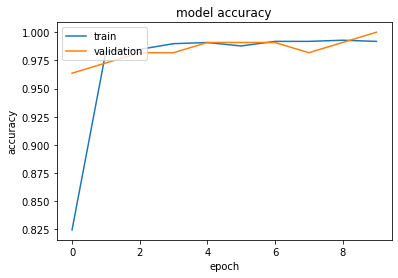

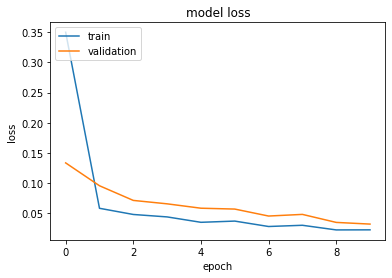

14/14 [==============================] - 0s 4ms/step - loss: 0.1574 - accuracy: 0.9547
[0.15741649270057678, 0.9546998739242554]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       833
         1.0       0.56      0.96      0.71        50

    accuracy                           0.95       883
   macro avg       0.78      0.96      0.84       883
weighted avg       0.97      0.95      0.96       883



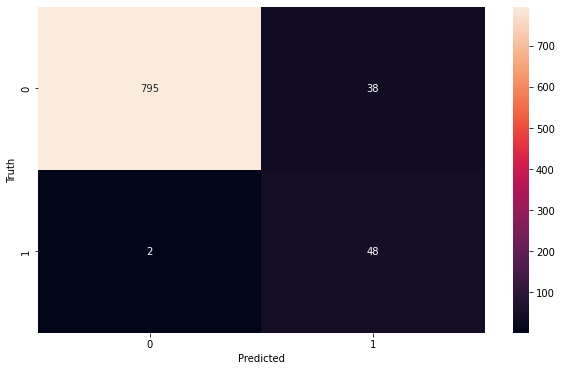

In [34]:
y_pred11_CNN = CNN(trainX11, trainy11, testX, testy, 'binary_crossentropy')

Epoch 1/10
23/23 [==============================] - 2s 42ms/step - loss: 0.2173 - accuracy: 0.9206 - val_loss: 0.0633 - val_accuracy: 0.9874
Epoch 2/10
23/23 [==============================] - 0s 14ms/step - loss: 0.0480 - accuracy: 0.9881 - val_loss: 0.0510 - val_accuracy: 0.9874
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.0357 - val_accuracy: 0.9874
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.0378 - val_accuracy: 0.9937
Epoch 5/10
23/23 [==============================] - 0s 13ms/step - loss: 0.0396 - accuracy: 0.9859 - val_loss: 0.0504 - val_accuracy: 0.9937
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0201 - val_accuracy: 0.9937
Epoch 8/10
23

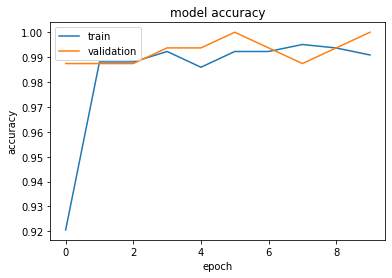

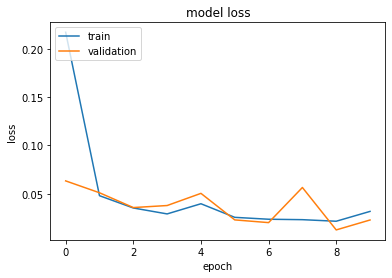

14/14 [==============================] - 0s 4ms/step - loss: 0.2013 - accuracy: 0.9388
[0.201308012008667, 0.9388448596000671]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       833
         1.0       0.48      0.98      0.64        50

    accuracy                           0.94       883
   macro avg       0.74      0.96      0.81       883
weighted avg       0.97      0.94      0.95       883



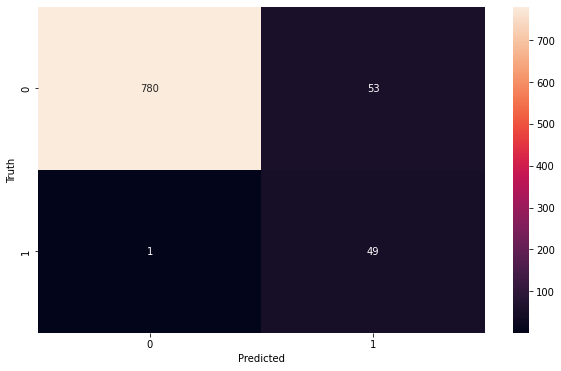

In [35]:
y_pred21_CNN = CNN(trainX21, trainy21, testX, testy, 'binary_crossentropy')

Epoch 1/10
24/24 [==============================] - 2s 29ms/step - loss: 0.4269 - accuracy: 0.8188 - val_loss: 0.1692 - val_accuracy: 0.9591
Epoch 2/10
24/24 [==============================] - 0s 12ms/step - loss: 0.1046 - accuracy: 0.9713 - val_loss: 0.0498 - val_accuracy: 0.9942
Epoch 3/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0687 - accuracy: 0.9831 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0561 - accuracy: 0.9863 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0502 - accuracy: 0.9863 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0613 - accuracy: 0.9850 - val_loss: 0.0846 - val_accuracy: 0.9766
Epoch 7/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0411 - accuracy: 0.9902 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 8/10
24

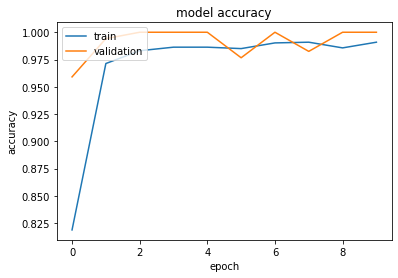

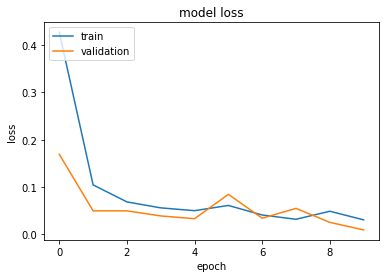

14/14 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9626
[0.10694210231304169, 0.9626274108886719]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       833
         1.0       0.60      0.98      0.75        50

    accuracy                           0.96       883
   macro avg       0.80      0.97      0.86       883
weighted avg       0.98      0.96      0.97       883



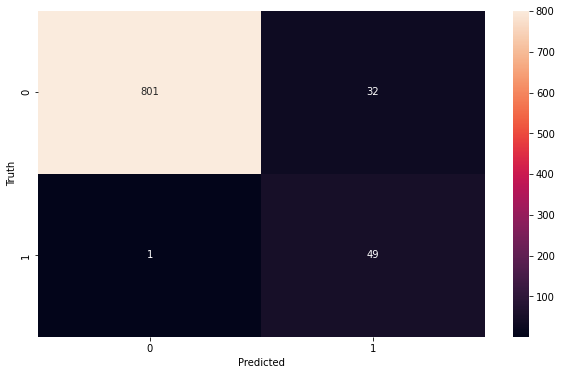

In [36]:
y_pred31_CNN = CNN(trainX31, trainy31, testX, testy, 'binary_crossentropy')

In [37]:
trainX12, trainy12 = train_set(dataframe_train0, dataframe_train1.sample(548), 548, 1096)
print(trainX12.shape, trainy12.shape, testX.shape, testy.shape)

(1096, 60, 12) (1096, 1) (883, 60, 12) (883, 1)


In [38]:
trainX22, trainy22 = train_set(dataframe_train0, dataframe_train1, 791, 1582)
print(trainX22.shape, trainy22.shape, testX.shape, testy.shape)

(1582, 60, 12) (1582, 1) (883, 60, 12) (883, 1)


In [39]:
trainX32, trainy32 = train_set(dataframe_train0, dataframe_train1, 914, 1828)
print(trainX32.shape, trainy32.shape, testX.shape, testy.shape)

(1705, 60, 12) (1705, 1) (883, 60, 12) (883, 1)


Epoch 1/10
16/16 [==============================] - 2s 36ms/step - loss: 0.3250 - accuracy: 0.8611 - val_loss: 0.1235 - val_accuracy: 0.9636
Epoch 2/10
16/16 [==============================] - 0s 13ms/step - loss: 0.1062 - accuracy: 0.9686 - val_loss: 0.0882 - val_accuracy: 0.9727
Epoch 3/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0668 - accuracy: 0.9807 - val_loss: 0.0654 - val_accuracy: 0.9818
Epoch 4/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.0537 - val_accuracy: 0.9727
Epoch 5/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0402 - accuracy: 0.9868 - val_loss: 0.0420 - val_accuracy: 0.9636
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.0303 - val_accuracy: 0.9818
Epoch 7/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.9899 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 8/10
16

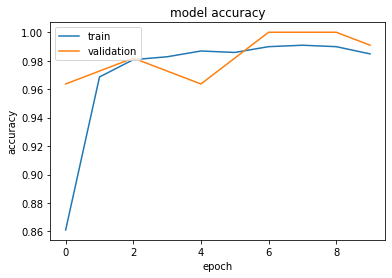

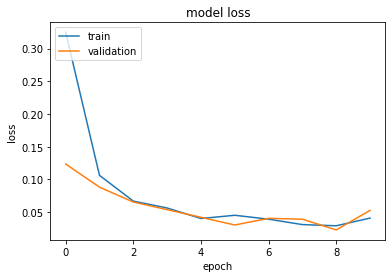

14/14 [==============================] - 0s 5ms/step - loss: 0.7977 - accuracy: 0.5504
[0.7976955771446228, 0.5503963828086853]
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.69       833
         1.0       0.11      1.00      0.20        50

    accuracy                           0.55       883
   macro avg       0.56      0.76      0.44       883
weighted avg       0.95      0.55      0.66       883



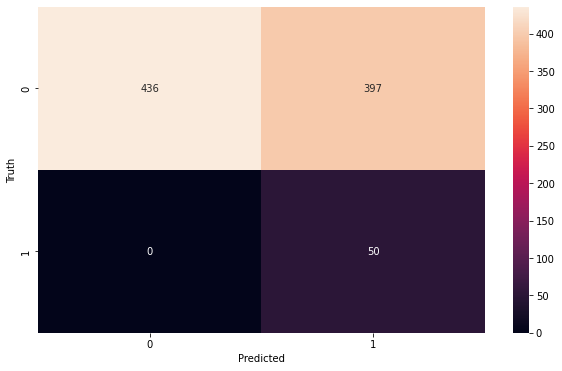

In [40]:
y_pred12_CNN = CNN(trainX12, trainy12, testX, testy, 'binary_crossentropy')

Epoch 1/10
23/23 [==============================] - 2s 31ms/step - loss: 0.2767 - accuracy: 0.8756 - val_loss: 0.0749 - val_accuracy: 0.9811
Epoch 2/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0649 - accuracy: 0.9810 - val_loss: 0.0960 - val_accuracy: 0.9748
Epoch 3/10
23/23 [==============================] - 0s 13ms/step - loss: 0.0730 - accuracy: 0.9754 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.9895 - val_loss: 0.0559 - val_accuracy: 0.9937
Epoch 5/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.9909 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0412 - accuracy: 0.9888 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0323 - accuracy: 0.9881 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 8/10
23

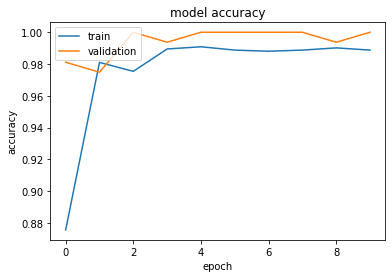

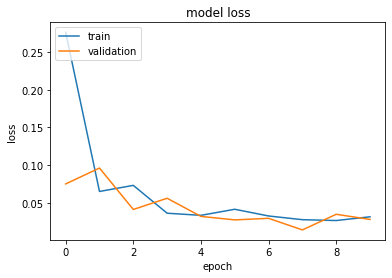

14/14 [==============================] - 0s 4ms/step - loss: 0.1569 - accuracy: 0.9581
[0.15694913268089294, 0.9580973982810974]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       833
         1.0       0.58      0.98      0.73        50

    accuracy                           0.96       883
   macro avg       0.79      0.97      0.85       883
weighted avg       0.97      0.96      0.96       883



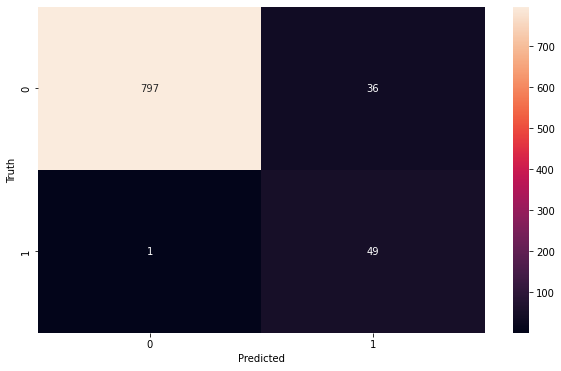

In [41]:
y_pred22_CNN = CNN(trainX22, trainy22, testX, testy, 'binary_crossentropy')

Epoch 1/10
24/24 [==============================] - 2s 26ms/step - loss: 0.2420 - accuracy: 0.9146 - val_loss: 0.0756 - val_accuracy: 0.9825
Epoch 2/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0520 - accuracy: 0.9850 - val_loss: 0.0544 - val_accuracy: 0.9883
Epoch 3/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0451 - accuracy: 0.9837 - val_loss: 0.0342 - val_accuracy: 0.9883
Epoch 4/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 0.9902 - val_loss: 0.0253 - val_accuracy: 0.9942
Epoch 5/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0267 - val_accuracy: 0.9942
Epoch 6/10
24/24 [==============================] - 0s 11ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0262 - val_accuracy: 0.9942
Epoch 7/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0167 - accuracy: 0.9961 - val_loss: 0.0230 - val_accuracy: 0.9942
Epoch 8/10
24

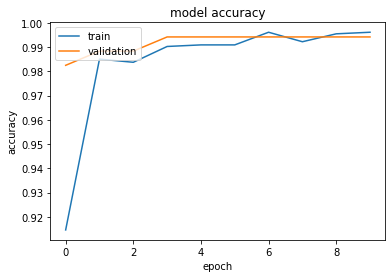

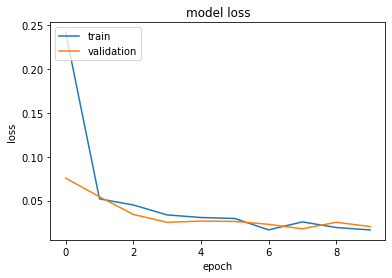

14/14 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 0.8958
[0.2719149887561798, 0.8958097100257874]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       833
         1.0       0.35      1.00      0.52        50

    accuracy                           0.90       883
   macro avg       0.68      0.94      0.73       883
weighted avg       0.96      0.90      0.92       883



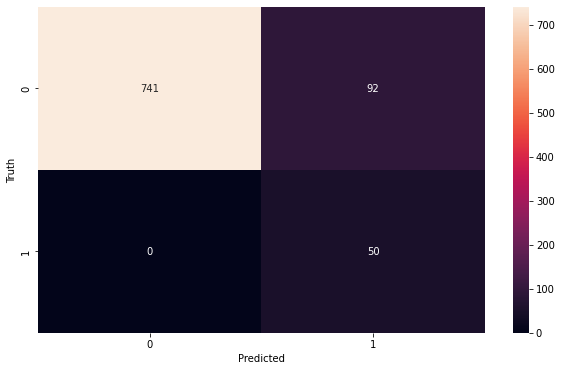

In [42]:
y_pred32_CNN = CNN(trainX32, trainy32, testX, testy, 'binary_crossentropy')

In [43]:
trainX13, trainy13 = train_set(dataframe_train0, dataframe_train1.sample(548), 1096, 1644)
print(trainX13.shape, trainy13.shape, testX.shape, testy.shape)

(1096, 60, 12) (1096, 1) (883, 60, 12) (883, 1)


In [44]:
trainX23, trainy23 = train_set(dataframe_train0, dataframe_train1, 1582, 2742)
print(trainX23.shape, trainy23.shape, testX.shape, testy.shape)

(1951, 60, 12) (1951, 1) (883, 60, 12) (883, 1)


In [45]:
trainX33, trainy33 = train_set(dataframe_train0, dataframe_train1, 1828, 2742)
print(trainX33.shape, trainy33.shape, testX.shape, testy.shape)

(1705, 60, 12) (1705, 1) (883, 60, 12) (883, 1)


Epoch 1/10
16/16 [==============================] - 2s 35ms/step - loss: 0.4049 - accuracy: 0.8286 - val_loss: 0.2057 - val_accuracy: 0.9455
Epoch 2/10
16/16 [==============================] - 0s 12ms/step - loss: 0.1086 - accuracy: 0.9655 - val_loss: 0.1764 - val_accuracy: 0.9364
Epoch 3/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0914 - accuracy: 0.9736 - val_loss: 0.1096 - val_accuracy: 0.9727
Epoch 4/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0716 - accuracy: 0.9736 - val_loss: 0.0993 - val_accuracy: 0.9636
Epoch 5/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0562 - accuracy: 0.9807 - val_loss: 0.0939 - val_accuracy: 0.9727
Epoch 6/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0914 - val_accuracy: 0.9727
Epoch 7/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0430 - accuracy: 0.9878 - val_loss: 0.0959 - val_accuracy: 0.9636
Epoch 8/10
16

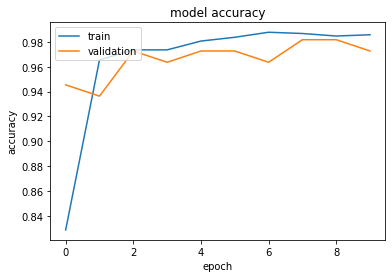

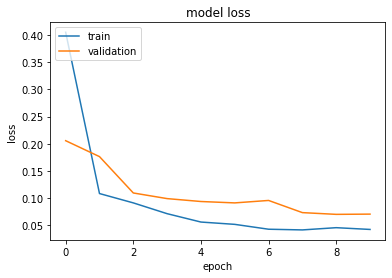

14/14 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9536
[0.10342481732368469, 0.953567385673523]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       833
         1.0       0.55      0.96      0.70        50

    accuracy                           0.95       883
   macro avg       0.77      0.96      0.84       883
weighted avg       0.97      0.95      0.96       883



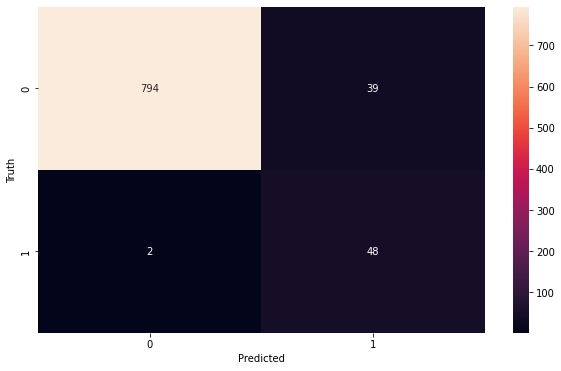

In [46]:
y_pred13_CNN = CNN(trainX13, trainy13, testX, testy, 'binary_crossentropy')

Epoch 1/10
28/28 [==============================] - 2s 25ms/step - loss: 0.2860 - accuracy: 0.8758 - val_loss: 0.1241 - val_accuracy: 0.9847
Epoch 2/10
28/28 [==============================] - 0s 12ms/step - loss: 0.0625 - accuracy: 0.9812 - val_loss: 0.0742 - val_accuracy: 0.9796
Epoch 3/10
28/28 [==============================] - 0s 11ms/step - loss: 0.0468 - accuracy: 0.9840 - val_loss: 0.0642 - val_accuracy: 0.9796
Epoch 4/10
28/28 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.9892 - val_loss: 0.0580 - val_accuracy: 0.9898
Epoch 5/10
28/28 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.9909 - val_loss: 0.0495 - val_accuracy: 0.9898
Epoch 6/10
28/28 [==============================] - 0s 11ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0565 - val_accuracy: 0.9796
Epoch 7/10
28/28 [==============================] - 0s 11ms/step - loss: 0.0540 - accuracy: 0.9852 - val_loss: 0.0486 - val_accuracy: 0.9898
Epoch 8/10
28

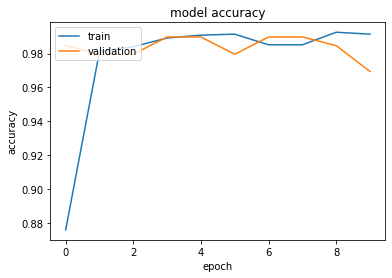

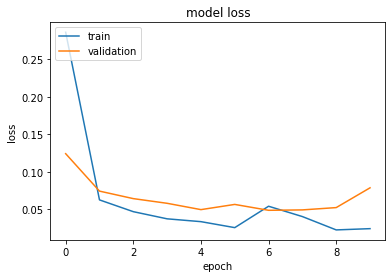

14/14 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 0.9887
[0.040114354342222214, 0.9886749982833862]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       833
         1.0       1.00      0.80      0.89        50

    accuracy                           0.99       883
   macro avg       0.99      0.90      0.94       883
weighted avg       0.99      0.99      0.99       883



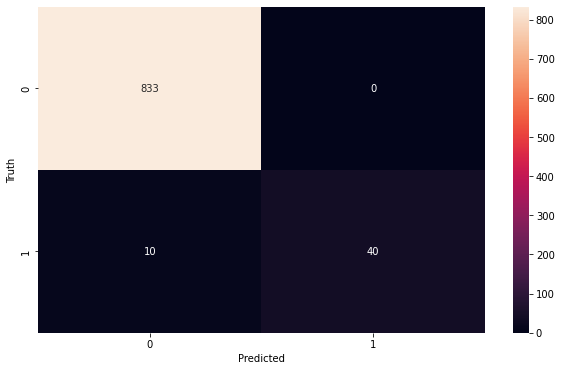

In [47]:
y_pred23_CNN = CNN(trainX23, trainy23, testX, testy, 'binary_crossentropy')

Epoch 1/10
24/24 [==============================] - 2s 41ms/step - loss: 0.2735 - accuracy: 0.8879 - val_loss: 0.1416 - val_accuracy: 0.9591
Epoch 2/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0927 - accuracy: 0.9726 - val_loss: 0.1020 - val_accuracy: 0.9649
Epoch 3/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0651 - accuracy: 0.9824 - val_loss: 0.0764 - val_accuracy: 0.9825
Epoch 4/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0544 - accuracy: 0.9824 - val_loss: 0.0690 - val_accuracy: 0.9883
Epoch 5/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0549 - val_accuracy: 0.9825
Epoch 6/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0488 - val_accuracy: 0.9883
Epoch 7/10
24/24 [==============================] - 0s 12ms/step - loss: 0.0520 - accuracy: 0.9817 - val_loss: 0.0612 - val_accuracy: 0.9766
Epoch 8/10
24

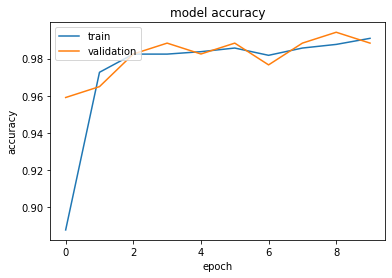

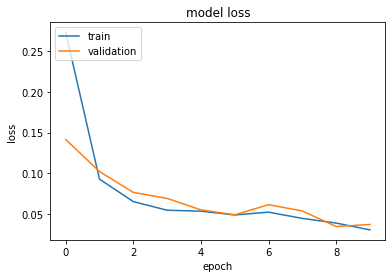

14/14 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9955
[0.04791964963078499, 0.9954699873924255]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       833
         1.0       1.00      0.92      0.96        50

    accuracy                           1.00       883
   macro avg       1.00      0.96      0.98       883
weighted avg       1.00      1.00      1.00       883



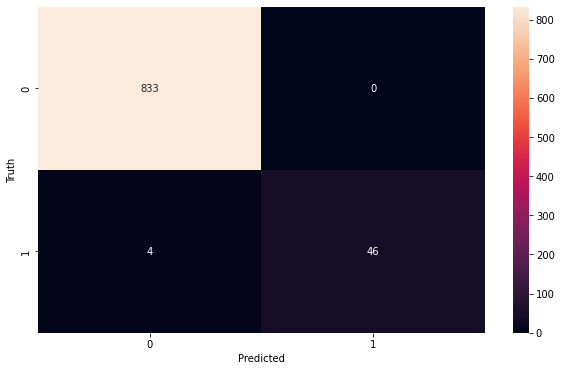

In [48]:
y_pred33_CNN = CNN(trainX33, trainy33, testX, testy, 'binary_crossentropy')

In [49]:
trainX14, trainy14 = train_set(dataframe_train0, dataframe_train1.sample(549), 1644, 2193)
print(trainX14.shape, trainy14.shape, testX.shape, testy.shape)

(1098, 60, 12) (1098, 1) (883, 60, 12) (883, 1)


Epoch 1/10
16/16 [==============================] - 2s 35ms/step - loss: 0.3380 - accuracy: 0.8451 - val_loss: 0.1835 - val_accuracy: 0.9545
Epoch 2/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0985 - accuracy: 0.9656 - val_loss: 0.1460 - val_accuracy: 0.9545
Epoch 3/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0730 - accuracy: 0.9747 - val_loss: 0.1046 - val_accuracy: 0.9636
Epoch 4/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0492 - accuracy: 0.9828 - val_loss: 0.0764 - val_accuracy: 0.9727
Epoch 5/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0765 - val_accuracy: 0.9727
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.0637 - val_accuracy: 0.9727
Epoch 7/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9868 - val_loss: 0.0625 - val_accuracy: 0.9727
Epoch 8/10
16

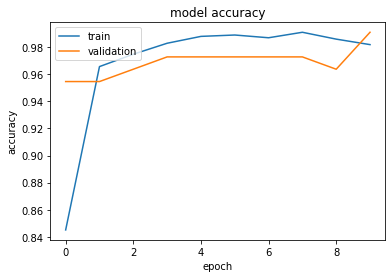

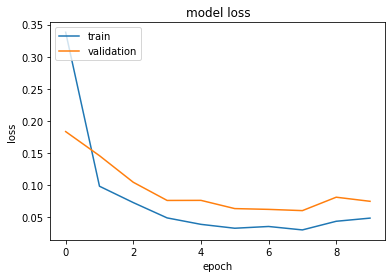

14/14 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.7542
[0.44774988293647766, 0.7542468905448914]
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85       833
         1.0       0.18      0.98      0.31        50

    accuracy                           0.75       883
   macro avg       0.59      0.86      0.58       883
weighted avg       0.95      0.75      0.82       883



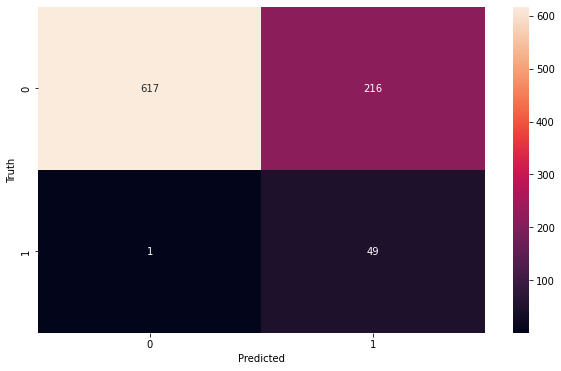

In [50]:
y_pred14_CNN = CNN(trainX14, trainy14, testX, testy, 'binary_crossentropy')

In [51]:
trainX15, trainy15 = train_set(dataframe_train0, dataframe_train1.sample(549), 2193, 2742)
print(trainX15.shape, trainy15.shape, testX.shape, testy.shape)

(1098, 60, 12) (1098, 1) (883, 60, 12) (883, 1)


Epoch 1/10
16/16 [==============================] - 2s 35ms/step - loss: 0.3132 - accuracy: 0.8765 - val_loss: 0.1952 - val_accuracy: 0.9545
Epoch 2/10
16/16 [==============================] - 0s 13ms/step - loss: 0.1181 - accuracy: 0.9636 - val_loss: 0.1242 - val_accuracy: 0.9455
Epoch 3/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0807 - accuracy: 0.9777 - val_loss: 0.1050 - val_accuracy: 0.9545
Epoch 4/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0572 - accuracy: 0.9798 - val_loss: 0.1026 - val_accuracy: 0.9818
Epoch 5/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0542 - accuracy: 0.9818 - val_loss: 0.0739 - val_accuracy: 0.9727
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0479 - accuracy: 0.9858 - val_loss: 0.0797 - val_accuracy: 0.9727
Epoch 7/10
16/16 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0688 - val_accuracy: 0.9818
Epoch 8/10
16

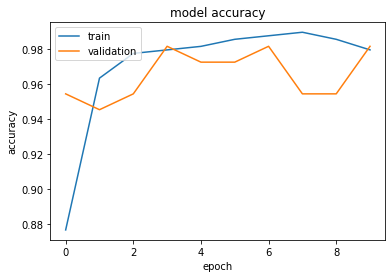

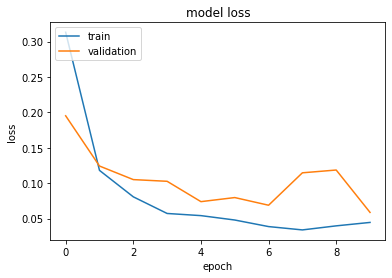

14/14 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.9909
[0.1299249231815338, 0.9909399747848511]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       833
         1.0       0.88      0.98      0.92        50

    accuracy                           0.99       883
   macro avg       0.94      0.99      0.96       883
weighted avg       0.99      0.99      0.99       883



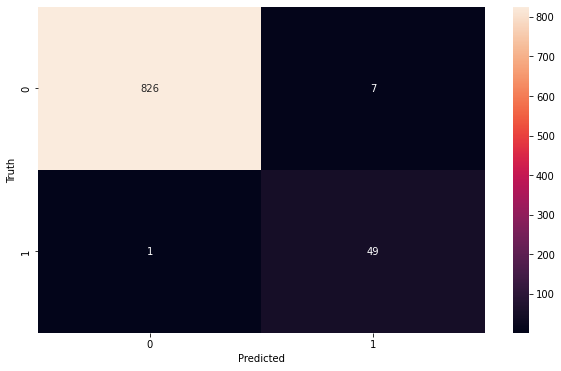

In [52]:
y_pred15_CNN = CNN(trainX15, trainy15, testX, testy, 'binary_crossentropy')

In [53]:
def final_result23(y_pred1, y_pred2, y_pred3):
    y_pred_final = y_pred1.copy()
    for i in range(len(y_pred1)):
        n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
        if n_ones>1:
            y_pred_final[i]=1
        else:
            y_pred_final[i]=0
    return y_pred_final

In [54]:
y_pred_final2_CNN = final_result23(y_pred21_CNN, y_pred22_CNN, y_pred23_CNN)
y_pred_final3_CNN = final_result23(y_pred31_CNN, y_pred32_CNN, y_pred33_CNN)

In [55]:
print(classification_report(testy, y_pred_final2_CNN), classification_report(testy, y_pred_final3_CNN))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       833
         1.0       0.58      0.98      0.73        50

    accuracy                           0.96       883
   macro avg       0.79      0.97      0.85       883
weighted avg       0.98      0.96      0.96       883
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       833
         1.0       0.91      0.98      0.94        50

    accuracy                           0.99       883
   macro avg       0.95      0.99      0.97       883
weighted avg       0.99      0.99      0.99       883



Text(69.0, 0.5, 'Truth')

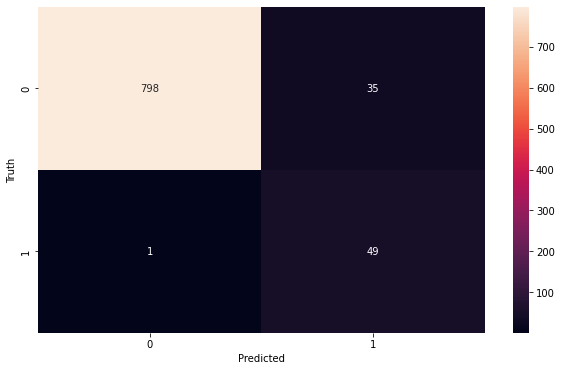

In [56]:
cm2_CNN = tf.math.confusion_matrix(labels = testy, predictions =y_pred_final2_CNN)

plt.figure(figsize =(10,6))
sn.heatmap(cm2_CNN, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

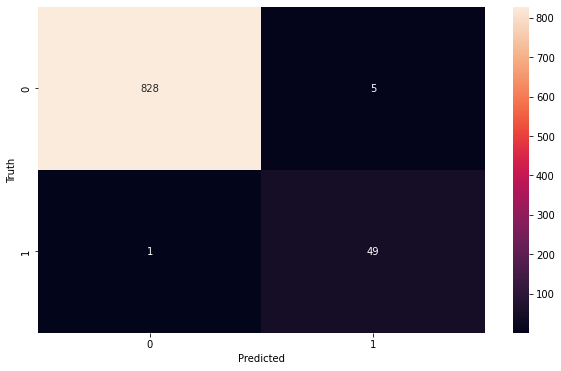

In [57]:
cm3_CNN = tf.math.confusion_matrix(labels = testy, predictions =y_pred_final3_CNN)

plt.figure(figsize =(10,6))
sn.heatmap(cm3_CNN, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
def final_result1(y_pred1, y_pred2, y_pred3, y_pred4, y_pred5):
    y_pred_final = y_pred1.copy()
    for i in range(len(y_pred1)):
        n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]+y_pred5[i]
        if n_ones>2:
            y_pred_final[i]=1
        else:
            y_pred_final[i]=0
    return y_pred_final

In [59]:
y_pred_final1_CNN = final_result1(y_pred11_CNN, y_pred12_CNN, y_pred13_CNN, y_pred14_CNN, y_pred15_CNN)

In [60]:
print(classification_report(testy, y_pred_final1_CNN))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       833
         1.0       0.59      0.98      0.74        50

    accuracy                           0.96       883
   macro avg       0.79      0.97      0.86       883
weighted avg       0.98      0.96      0.96       883



Text(69.0, 0.5, 'Truth')

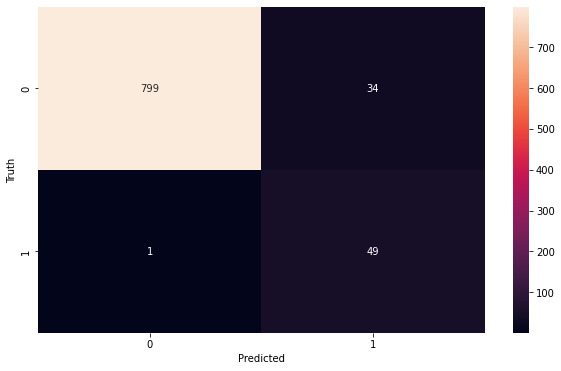

In [61]:
cm1_CNN = tf.math.confusion_matrix(labels = testy, predictions =y_pred_final1_CNN)

plt.figure(figsize =(10,6))
sn.heatmap(cm1_CNN, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')